# NeuroClassifier - Classifier Example

In [1]:
import EvolutionaryComputation.NeuroEvolution as ne

## Iris Dataset 
Goal is to predict the species given the petal and sepal widths and lengths

In [2]:
from sklearn.datasets import load_iris
from scipy.stats import zscore
import pandas as pd
import numpy as np

In [3]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

# Preprocessing

In [4]:
# number of observations
n = len(iris.data)

# create indices
ind = np.asarray(range(0, n))
# shuffle
np.random.shuffle(ind)

# percentages
train = 0.6  
val = 0.8 

# train, val, test indices
train_ind = ind[0:int(train*n)]  # train is 60% of data
val_ind = ind[int(train*n):int(val*n)]  # validation is 20% of data
test_ind = ind[int(val*n):n]  # test is 20% of data

In [5]:
x = pd.DataFrame(iris.data, columns = iris.feature_names)
# convert to numpy array
x = np.asarray(x)

# scale between 0 and 1
mx = np.max(x, axis=0)
mn = np.min(x, axis=0)
x = (x-mn)/(mx-mn)

# rewrite x for features and y for targets
y = np.asarray(pd.get_dummies(iris['target']))

In [6]:
x[0:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

In [7]:
y[0:5]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

# Testing Models
Because the `greedy` algorithm creates $8$ offspring per set of parents, a total of $O(8*n*m)$ models are created, where *n* refers to the generation size and *m* refers to the number of generations. On the other hand, `self-adaptive` algorithm only creates $4$ offspring per set of parents. Lastly, the `generic` algorithm creates $4$ offspring per set of parents. In order to accurately compare the algorithms for the given dataset, all models will have the same population size of $25$, and activation function, $relu$; but, their maximum number of generations will diff such that only $40000$ models are created. 
- `greedy`: max_epoch=200
- `generic`: max_epoch=400
- `self-adaptive`: max_epoch=400

In [8]:
layer_nodes = [50, 50, 50]  # three hidden layers, 50 nodes each
num_input = x.shape[1]  # number of variables
num_output = 3
population_size = 25

## Greedy Algorithm

In [9]:
model1 = ne.NeuroClassifier(layer_nodes=layer_nodes, num_input=num_input, num_output=num_output,
                         population_size=population_size, activation_function='relu')

In [10]:
model1.evolve(max_epoch=200, batch_size=50, train_data=[x[train_ind], y[train_ind]], val_data=[x[val_ind], y[val_ind]],
             early_stopping=True, verbose=True,
             warm_start=False, algorithm='greedy', patience=15)

Number of Trainable Parameters Per Network: 5501
Epoch 1/200
 Batch 2/2   Results for Batch: Best Loss: 1.0076011 Mean Loss: 1.1226872 Val Loss: 1.0863615
Epoch 2/200
 Batch 2/2   Results for Batch: Best Loss: 1.0076011 Mean Loss: 1.0538986 Val Loss: 1.0744313
Epoch 3/200
 Batch 2/2   Results for Batch: Best Loss: 0.9925307 Mean Loss: 1.0087743 Val Loss: 1.0659379
Epoch 4/200
 Batch 2/2   Results for Batch: Best Loss: 0.9554899 Mean Loss: 0.985804 Val Loss: 1.04360123
Epoch 5/200
 Batch 2/2   Results for Batch: Best Loss: 0.9272209 Mean Loss: 0.9632546 Val Loss: 1.014746
Epoch 6/200
 Batch 2/2   Results for Batch: Best Loss: 0.9116338 Mean Loss: 0.9424597 Val Loss: 0.9941967
Epoch 7/200
 Batch 2/2   Results for Batch: Best Loss: 0.8903215 Mean Loss: 0.9122828 Val Loss: 0.9776618
Epoch 8/200
 Batch 2/2   Results for Batch: Best Loss: 0.8713045 Mean Loss: 0.893165 Val Loss: 0.95765711
Epoch 9/200
 Batch 2/2   Results for Batch: Best Loss: 0.8400897 Mean Loss: 0.8699304 Val Loss: 0.940003

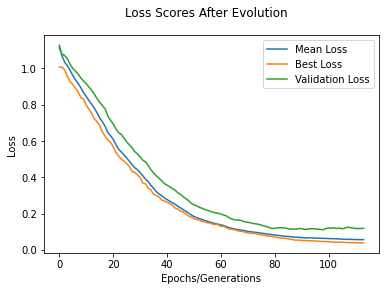

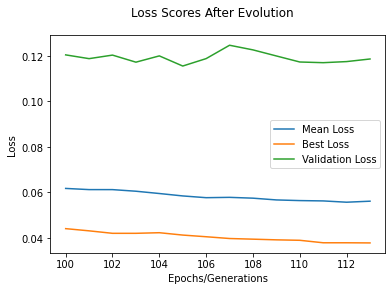

In [12]:
model1.plot()
model1.plot(starting_gen=100)

# Generic Algorithm

In [31]:
model2 = ne.NeuroClassifier(layer_nodes=layer_nodes, num_input=num_input, num_output=num_output,
                         population_size=population_size, activation_function='relu')

In [32]:
model2.evolve(max_epoch=400, batch_size=50, train_data=[x[train_ind], y[train_ind]], val_data=[x[val_ind], y[val_ind]],
             early_stopping=True, verbose=True,
             warm_start=False, algorithm='generic', patience=15)

Number of Trainable Parameters Per Network: 5501
Epoch 1/400
 Batch 2/2   Results for Batch: Best Loss: 1.0580388 Mean Loss: 1.1180917 Val Loss: 1.1050493
Epoch 2/400
 Batch 2/2   Results for Batch: Best Loss: 1.0886269 Mean Loss: 1.1052694 Val Loss: 1.1067963
Epoch 3/400
 Batch 2/2   Results for Batch: Best Loss: 1.0945836 Mean Loss: 1.1025897 Val Loss: 1.1077301
Epoch 4/400
 Batch 2/2   Results for Batch: Best Loss: 1.0898996 Mean Loss: 1.1013964 Val Loss: 1.1066279
Epoch 5/400
 Batch 2/2   Results for Batch: Best Loss: 1.0898996 Mean Loss: 1.0975767 Val Loss: 1.1048417
Epoch 6/400
 Batch 2/2   Results for Batch: Best Loss: 1.0893254 Mean Loss: 1.0952225 Val Loss: 1.1020205
Epoch 7/400
 Batch 2/2   Results for Batch: Best Loss: 1.0866091 Mean Loss: 1.0941469 Val Loss: 1.1007786
Epoch 8/400
 Batch 2/2   Results for Batch: Best Loss: 1.0858186 Mean Loss: 1.0912244 Val Loss: 1.0999898
Epoch 9/400
 Batch 2/2   Results for Batch: Best Loss: 1.0819341 Mean Loss: 1.0885198 Val Loss: 1.09853

 Batch 2/2   Results for Batch: Best Loss: 0.3119816 Mean Loss: 0.3189117 Val Loss: 0.3765043
Epoch 154/400
 Batch 2/2   Results for Batch: Best Loss: 0.3081463 Mean Loss: 0.3162248 Val Loss: 0.3707537
Epoch 155/400
 Batch 2/2   Results for Batch: Best Loss: 0.302604 Mean Loss: 0.311697 Val Loss: 0.3652264
Epoch 156/400
 Batch 2/2   Results for Batch: Best Loss: 0.3021695 Mean Loss: 0.3081089 Val Loss: 0.3620632
Epoch 157/400
 Batch 2/2   Results for Batch: Best Loss: 0.2971865 Mean Loss: 0.3037774 Val Loss: 0.3583234
Epoch 158/400
 Batch 2/2   Results for Batch: Best Loss: 0.2932782 Mean Loss: 0.3008647 Val Loss: 0.3519247
Epoch 159/400
 Batch 2/2   Results for Batch: Best Loss: 0.2862071 Mean Loss: 0.2964746 Val Loss: 0.3470302
Epoch 160/400
 Batch 2/2   Results for Batch: Best Loss: 0.2819694 Mean Loss: 0.2956396 Val Loss: 0.3394934
Epoch 161/400
 Batch 2/2   Results for Batch: Best Loss: 0.2749701 Mean Loss: 0.2877149 Val Loss: 0.3316828
Epoch 162/400
 Batch 2/2   Results for Batch

 Batch 2/2   Results for Batch: Best Loss: 0.10958 Mean Loss: 0.1121096 Val Loss: 0.10324059
Epoch 230/400
 Batch 2/2   Results for Batch: Best Loss: 0.1076197 Mean Loss: 0.1106596 Val Loss: 0.1036123
Epoch 231/400
 Batch 2/2   Results for Batch: Best Loss: 0.104189 Mean Loss: 0.109194 Val Loss: 0.10178949
Epoch 232/400
 Batch 2/2   Results for Batch: Best Loss: 0.104189 Mean Loss: 0.1075656 Val Loss: 0.10078261
Epoch 233/400
 Batch 2/2   Results for Batch: Best Loss: 0.1041885 Mean Loss: 0.1061195 Val Loss: 0.0996456
Epoch 234/400
 Batch 2/2   Results for Batch: Best Loss: 0.1018766 Mean Loss: 0.1047382 Val Loss: 0.0994074
Epoch 235/400
 Batch 2/2   Results for Batch: Best Loss: 0.1018801 Mean Loss: 0.1035251 Val Loss: 0.0994958
Epoch 236/400
 Batch 2/2   Results for Batch: Best Loss: 0.1016822 Mean Loss: 0.1028315 Val Loss: 0.0978414
Epoch 237/400
 Batch 2/2   Results for Batch: Best Loss: 0.1006086 Mean Loss: 0.1019685 Val Loss: 0.0944168
Epoch 238/400
 Batch 2/2   Results for Batch

 Batch 2/2   Results for Batch: Best Loss: 0.076744 Mean Loss: 0.0774239 Val Loss: 0.07504985
Epoch 306/400
 Batch 2/2   Results for Batch: Best Loss: 0.0761093 Mean Loss: 0.0774632 Val Loss: 0.0752186
Epoch 307/400
 Batch 2/2   Results for Batch: Best Loss: 0.0763846 Mean Loss: 0.0774099 Val Loss: 0.07583
Epoch 308/400
 Batch 2/2   Results for Batch: Best Loss: 0.0764759 Mean Loss: 0.0774037 Val Loss: 0.0757728
Over Fitting


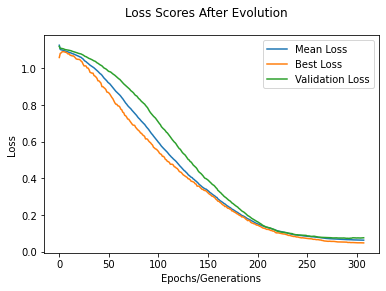

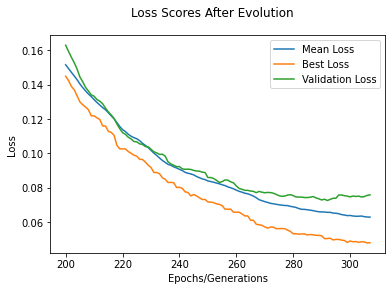

In [33]:
model2.plot()
model2.plot(starting_gen=200)

# Self-Adaptive Algorithm

In [34]:
model3 = ne.NeuroClassifier(layer_nodes=layer_nodes, num_input=num_input, num_output=num_output,
                         population_size=population_size, activation_function='relu')

In [35]:
model3.evolve(max_epoch=400, batch_size=50, train_data=[x[train_ind], y[train_ind]], val_data=[x[val_ind], y[val_ind]],
             early_stopping=True, verbose=True,
             warm_start=False, algorithm='self-adaptive', patience=15)

Number of Trainable Parameters Per Network: 5501
Epoch 1/400
 Batch 2/2   Results for Batch: Best Loss: 1.0520664 Mean Loss: 1.1069191 Val Loss: 1.0714054
Epoch 2/400
 Batch 2/2   Results for Batch: Best Loss: 1.0393176 Mean Loss: 1.0597692 Val Loss: 1.0483929
Epoch 3/400
 Batch 2/2   Results for Batch: Best Loss: 0.9899736 Mean Loss: 1.0288208 Val Loss: 1.0208882
Epoch 4/400
 Batch 2/2   Results for Batch: Best Loss: 0.9744742 Mean Loss: 0.9927746 Val Loss: 1.0089597
Epoch 5/400
 Batch 2/2   Results for Batch: Best Loss: 0.9490436 Mean Loss: 0.9714513 Val Loss: 0.9984767
Epoch 6/400
 Batch 2/2   Results for Batch: Best Loss: 0.914295 Mean Loss: 0.9502706 Val Loss: 0.98547859
Epoch 7/400
 Batch 2/2   Results for Batch: Best Loss: 0.887527 Mean Loss: 0.931089 Val Loss: 0.9749517
Epoch 8/400
 Batch 2/2   Results for Batch: Best Loss: 0.8725366 Mean Loss: 0.8973197 Val Loss: 0.9794334
Epoch 9/400
 Batch 2/2   Results for Batch: Best Loss: 0.8510988 Mean Loss: 0.8796315 Val Loss: 0.9616538

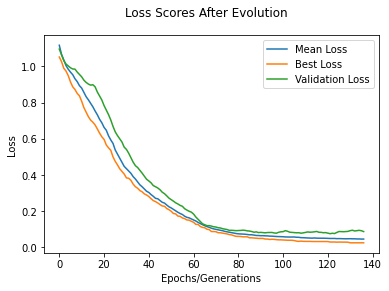

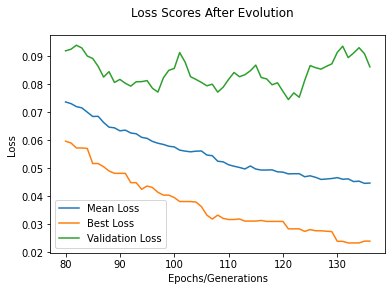

In [36]:
model3.plot()
model3.plot(starting_gen=80)

# Comparing Models
We will compare by use of accuracy score through the validation data

In [16]:
from sklearn.metrics import accuracy_score

In [38]:
r1 = accuracy_score(y[val_ind], pd.get_dummies(model1.predict(x[val_ind])))
r2 = accuracy_score(y[val_ind], pd.get_dummies(model2.predict(x[val_ind])))
r3 = accuracy_score(y[val_ind], pd.get_dummies(model3.predict(x[val_ind])))
print("Greedy: {}, Generic: {}, Self-Adaptive: {}".format(r1, r2, r3))

Greedy: 0.9333333333333333, Generic: 0.9666666666666667, Self-Adaptive: 0.9666666666666667


As we can see, all models performed relatively well, achieving accuracy scores above $90$%, meaning that they correctly classified the validation data species over $90$% of the time. However, we can see that there is a tie for the best model, between the `self-adaptive` and `generic` algorithm models. Without furthur analysis, the `generic` model will be selected without particular reason. 

# Testing Final Model

In [47]:
accuracy_score(y[test_ind], pd.get_dummies(model2.predict(x[test_ind])))

0.9333333333333333

As we can see, from the test data, our final model performs extremely well, accurately classifying $93$% of the species.

# Predicted Values in Original Form

In [45]:
model2.predict(x[test_ind])

array([0, 1, 0, 1, 0, 1, 2, 2, 2, 0, 1, 0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 1,
       0, 2, 0, 0, 0, 1, 2, 0], dtype=int64)

# Actual Values in Original Form

In [46]:
iris['target'][test_ind]

array([0, 2, 0, 1, 0, 1, 2, 2, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 2, 0, 1,
       0, 2, 0, 0, 0, 1, 2, 0])

# Compare Against Same Model Trained Through Numerical Methods

In [9]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
inputs = tf.keras.Input(shape=(num_input,))
m = layers.Dense(50, activation='relu')(inputs)
m = layers.Dense(50, activation='relu')(m)
m = layers.Dense(50, activation='relu')(m)
outputs = layers.Dense(num_output, activation='softmax')(m)
model = tf.keras.Model(inputs, outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_8 (Dense)              (None, 50)                250       
_________________________________________________________________
dense_9 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_10 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 153       
Total params: 5,503
Trainable params: 5,503
Non-trainable params: 0
_________________________________________________________________


In [26]:
callback = [EarlyStopping(monitor='loss', patience=10), EarlyStopping(monitor='val_loss', patience=10)]
history = model.fit(x[train_ind], y[train_ind], epochs=500, validation_data=(x[val_ind], y[val_ind]), 
          callbacks=callback)

Epoch 1/500
3/3 [==============================] - 0s 75ms/step - loss: 1.1022 - accuracy: 0.3667 - val_loss: 1.0690 - val_accuracy: 0.6000
Epoch 2/500
3/3 [==============================] - 0s 21ms/step - loss: 1.0589 - accuracy: 0.6000 - val_loss: 1.0321 - val_accuracy: 0.5667
Epoch 3/500
3/3 [==============================] - 0s 16ms/step - loss: 1.0279 - accuracy: 0.6222 - val_loss: 1.0013 - val_accuracy: 0.6333
Epoch 4/500
3/3 [==============================] - 0s 18ms/step - loss: 0.9983 - accuracy: 0.6333 - val_loss: 0.9754 - val_accuracy: 0.6000
Epoch 5/500
3/3 [==============================] - 0s 18ms/step - loss: 0.9742 - accuracy: 0.6333 - val_loss: 0.9534 - val_accuracy: 0.6333
Epoch 6/500
3/3 [==============================] - 0s 16ms/step - loss: 0.9513 - accuracy: 0.6667 - val_loss: 0.9321 - val_accuracy: 0.6333
Epoch 7/500
3/3 [==============================] - 0s 17ms/step - loss: 0.9289 - accuracy: 0.6667 - val_loss: 0.9094 - val_accuracy: 0.6667
Epoch 8/500
3/3 [===

3/3 [==============================] - 0s 17ms/step - loss: 0.0265 - accuracy: 1.0000 - val_loss: 0.0420 - val_accuracy: 0.9667
Epoch 118/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0260 - accuracy: 1.0000 - val_loss: 0.0446 - val_accuracy: 0.9667
Epoch 119/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0256 - accuracy: 1.0000 - val_loss: 0.0437 - val_accuracy: 0.9667
Epoch 120/500
3/3 [==============================] - 0s 18ms/step - loss: 0.0263 - accuracy: 0.9889 - val_loss: 0.0449 - val_accuracy: 0.9667
Epoch 121/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0274 - accuracy: 1.0000 - val_loss: 0.0385 - val_accuracy: 0.9667
Epoch 122/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0262 - accuracy: 1.0000 - val_loss: 0.0427 - val_accuracy: 0.9667
Epoch 123/500
3/3 [==============================] - 0s 19ms/step - loss: 0.0250 - accuracy: 0.9889 - val_loss: 0.0455 - val_accuracy: 0.9667
Epoch 124/500
3/3 [=

In [28]:
model.evaluate(x[val_ind], y[val_ind])

1/1 [==============================] - 0s 22ms/step - loss: 0.0380 - accuracy: 0.9667


[0.037997473031282425, 0.9666666388511658]

As we can see, the Keras model with the same architecture achieved the same accuracy score value for the validation, revealing that the genetic algorithm performed just as well as the numerical method optimizer for this classificaiton example.